In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
import itertools

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [242]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [243]:
def interpolate_data(y,m,b):
    x = (y-b)/ m
    return x

The equation for the line is m = 0.20299973140771355 and b = 0.4593146452359598
The score of the equation is 0.6922946529146998
The CPS for a temp of 95 is 19.744289128968745
The temp at 18 CPS is 86.40743134548568


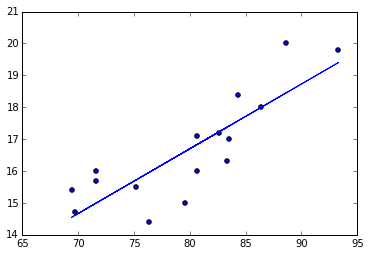

In [244]:
#Create the LinearRegression Object
crick_reg = linear_model.LinearRegression()

#Turn the cricket Data into a DataFrame
ground_cricket_df = pd.DataFrame(ground_cricket_data)

#Turn the temp into a verticle array
crick_x = np.array(ground_cricket_df['Ground Temperature'].values).reshape((-1,1))

#Turn the ground temp into an array
crick_y =np.array((ground_cricket_df['Chirps/Second'].values))

#Get the Linear Regression
crick_reg.fit(crick_x, crick_y)

#Print the Equation:
print('The equation for the line is m = {} and b = {}'.format(crick_reg.coef_[0], crick_reg.intercept_))

plt.scatter(cric_x, crick_y)
plt.scatter(86.40743134548568,18)
plt.plot(crick_x, crick_reg.predict(cric_x), color='blue')

#Print the score for the equtation
print('The score of the equation is {}'.format(crick_reg.score(crick_x, crick_y)))

#Predict the CPS for temp of 95
print('The CPS for a temp of 95 is {}'.format(crick_reg.predict(95)[0]))

#Interpolate the data for 18 CPS (option a)
def interpolate_data(y,m,b):
    x = (y-b)/ m
    return x
print('The temp at 18 CPS is {}'.format(interpolate_data(18,crick_reg.coef_, crick_reg.intercept_)[0]))

In [245]:
#Create the LinearRegression Object
crick_reg2 = linear_model.LinearRegression()

#Turn the cricket Data into a DataFrame
ground_cricket_df2 = pd.DataFrame(ground_cricket_data)

#Turn the temp into a verticle array
crick_x2 = np.array(ground_cricket_df2['Chirps/Second'].values).reshape((-1,1))
'Ground Temperature'
#Turn the ground temp into an array
crick_y2 =np.array((ground_cricket_df2['Ground Temperature'].values))

#Get the Linear Regression
crick_reg2.fit(crick_x2, crick_y2)

#Option 2
print('The temp at 18 CPS is {}'.format(interpolate_data(18,crick_reg.coef_, crick_reg.intercept_)[0]))

The temp at 18 CPS is 86.40743134548568


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

0.872662084304


<function matplotlib.pyplot.show>

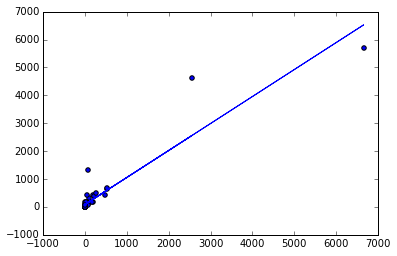

In [247]:
df = pd.read_fwf("brain_body.txt")

#Create the LinearRegression Object
brain_reg = linear_model.LinearRegression()

#create the x and y values
brain_x = np.array(df.Brain.values.reshape((-1,1)))
brain_y = np.array(df.Body.values)

#get the Lineral Regression
brain_reg.fit(brain_x,brain_y)

# Get the linReg Score
print(brain_reg.score(brain_x, brain_y))

#Plot it
plt.scatter(brain_x, brain_y)
plt.plot(brain_x, brain_reg.predict(brain_x), color='blue')
plt.show

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [248]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
print(df.head())

   Sex  Rank  Year  Degree  YSdeg  Salary
0    0     3    25       1     35   36350
1    0     3    13       1     22   35350
2    0     3    10       1     23   28200
3    1     3     7       1     27   26775
4    0     3    19       0     30   33696


In [259]:
def regression_for(combo):
    combo = list(combo)
    df = features.loc[:, combo + ['Salary']]
    df.dropna(inplace=True)
    input_data = df[combo]
    salary = df['Salary']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

In [305]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
#Prepare the data
features = df
salary = np.array(df['Salary'].values)
dependent_vars = list(features.columns)
dependent_vars.remove('Salary')

#Find the most linked variables
choices = []
for x in range(2,6):
    combos = list(itertools.combinations(dependent_vars, x))
    for combo in combos:
        regr, score = regression_for(combo)
        choices.append((combo, score))
        
# Display the most linked variable
best = sorted(choices, key=lambda x: x[1])[-1]
regr, score = regression_for(best[0])
print('The list of variables most linked to salary is \n{}\nWith a score of {}\nAnd a coeffciant of {}'.format(best[0], best[1], regr.coef_))
print('\n\n')

# See if sex is linked to salary:
sex_reg = linear_model.LinearRegression()
df_x = np.array(df['Sex'].values.reshape((-1,1)))
df_y = np.array(df['Salary'].values)
sex_reg.fit(df_x, df_y)
print('The coeffciant for the slop of the sex vs salary line is {}'.format(sex_reg.coef_[0]))
print('\nAs Sex in part of the list of most linked variables, and it has a negative coeffciant'
      '(because women are 1 on the list), we can conclude that there is a negative corrolation '
      'between being a women and earning a higher salary in this data')

The list of variables most linked to salary is 
('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')
With a score of 0.8547180674410968
And a coeffciant of [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]



The coeffciant for the slop of the sex vs salary line is -3339.6466165413503

As Sex in part of the list of most linked variables, and it has a negative coeffciant(because women are 1 on the list), we can conclude that there is a negative corrolation between being a women and earning a higher salary in this data
